Importation des packages

In [2]:
import pandas as pd
import numpy as np

Lecture des données et première analyse descriptive 

In [59]:
train = pd.read_csv('train.csv',sep=',')
test = pd.read_csv('test.csv',sep=',')
train.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,1,7.807690,Unhealthy,0,1,2,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,0,17.297628,Average,1,0,8,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,1,8.695288,Average,1,1,3,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,1,10.161587,Healthy,0,1,7,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,1,16.436787,Healthy,1,0,1,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

In [7]:
train.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.00000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.510414,259.880742,75.105991,0.652782,0.491869,0.896291,0.499857,0.595863,9.979109,0.498146,0.500143,5.451783,5.994007,158245.34893,28.878692,416.782026,3.491583,7.024822,0.357204
std,21.290957,80.709248,20.507160,0.476120,0.499970,0.304904,0.500036,0.490759,5.769721,0.500032,0.500036,2.857989,3.472022,80585.31666,6.322401,224.195136,2.281077,1.990908,0.479210
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.00000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.046024,0.000000,0.000000,3.000000,2.971831,88368.00000,23.422280,221.000000,2.000000,5.000000,0.000000
50%,53.000000,259.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,9.982968,0.000000,1.000000,5.000000,5.936919,157378.50000,28.737627,416.000000,3.000000,7.000000,0.000000
75%,72.000000,329.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.029659,1.000000,1.000000,8.000000,9.017592,227218.50000,34.321158,613.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.00000,39.993581,800.000000,7.000000,10.000000,1.000000


In [29]:
trainCorr = train 
trainCorr_numeric = trainCorr.select_dtypes(include=['int64', 'float64'])
trainCorr_numeric.corr(method='spearman')


# quand on a que des 0 et 1 on fait un khi 2 à la place de la corrélation
# v cramer pour les correlattion pour variable qualitative
# quanti quali : rapport de correlation et visuellement avec des boxplot 
# quanti quanti : correlation spearman (pour non linéaire)
# si j'ai minimum des quali ordinale on peut faire avec spearman


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,-0.010625,-0.002009,-0.008852,0.006794,0.398240,-0.003509,-0.002855,-0.003795,0.002609,-0.006930,0.025654,0.026264,-0.005246,-0.005867,-0.004858,0.003651,0.011421,0.012099
Cholesterol,-0.010625,1.000000,0.006955,-0.018816,-0.026108,0.019753,-0.009607,0.004841,0.011796,-0.007119,-0.008066,-0.030470,0.012264,0.006512,0.022409,-0.009239,0.009241,0.008678,0.020729
Heart Rate,-0.002009,0.006955,1.000000,0.011137,-0.010852,-0.014342,0.007760,-0.003254,0.010689,-0.002081,0.002340,0.004399,-0.021791,0.006937,0.003725,0.010913,-0.000386,0.007163,-0.004571
Diabetes,-0.008852,-0.018816,0.011137,1.000000,-0.011263,0.010390,0.008781,0.009361,-0.007788,-0.012893,-0.006384,-0.002328,0.005080,-0.001897,0.003296,0.015862,-0.004593,-0.017742,0.031538
Family History,0.006794,-0.026108,-0.010852,-0.011263,1.000000,0.009910,-0.005997,0.015970,-0.000570,0.003649,-0.003134,0.014484,0.010036,0.002104,-0.005824,-0.009424,-0.002867,-0.005470,-0.005145
Smoking,0.398240,0.019753,-0.014342,0.010390,0.009910,1.000000,0.012536,0.003997,-0.001922,0.000142,-0.010665,0.003657,0.021811,0.003788,0.005280,-0.004849,-0.008608,0.004640,-0.005188
Obesity,-0.003509,-0.009607,0.007760,0.008781,-0.005997,0.012536,1.000000,-0.028433,0.009307,0.001425,0.003709,0.007311,-0.006903,-0.018534,0.003104,0.012911,-0.005703,-0.009351,-0.012291
Alcohol Consumption,-0.002855,0.004841,-0.003254,0.009361,0.015970,0.003997,-0.028433,1.000000,-0.011631,0.003632,0.001688,-0.000430,-0.005448,-0.020654,0.006058,0.002857,0.001140,0.001768,-0.009732
Exercise Hours Per Week,-0.003795,0.011796,0.010689,-0.007788,-0.000570,-0.001922,0.009307,-0.011631,1.000000,0.009818,-0.009024,-0.009851,0.003340,-0.022911,-0.009763,0.000731,-0.000305,-0.001317,0.015978
Previous Heart Problems,0.002609,-0.007119,-0.002081,-0.012893,0.003649,0.000142,0.001425,0.003632,0.009818,1.000000,0.012840,-0.015676,0.010720,0.008795,0.019457,-0.017310,0.008587,0.004601,0.013482


In [41]:
# v cramer pour les correlattion pour variable qualitative

print(train.dtypes)
pd.set_option('display.max_columns', None)
print(train.head())
#pd.reset_option('display.max_columns')
#Diabetes
#Family History
#Smoking
#Obesity 
#Alcohol Consumption
#Previous Heart Problems
#Heart Attack Risk


Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [61]:
# Définir l'ordre des catégories
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=[0,1], ordered=True)

# Liste des colonnes à convertir
cols = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Heart Attack Risk']

# Convertir les colonnes en type qualitatif ordinal
for col in cols:
    train[col] = train[col].astype(cat_type)

print(train.dtypes)
train.head()

Patient ID                           object
Age                                   int64
Sex                                  object
Cholesterol                           int64
Blood Pressure                       object
Heart Rate                            int64
Diabetes                           category
Family History                     category
Smoking                            category
Obesity                            category
Alcohol Consumption                category
Exercise Hours Per Week             float64
Diet                                 object
Previous Heart Problems            category
Medication Use                     category
Stress Level                          int64
Sedentary Hours Per Day             float64
Income                                int64
BMI                                 float64
Triglycerides                         int64
Physical Activity Days Per Week       int64
Sleep Hours Per Day                   int64
Country                         

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,1,7.807690,Unhealthy,0,1,2,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,0,17.297628,Average,1,0,8,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,1,8.695288,Average,1,1,3,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,1,10.161587,Healthy,0,1,7,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,1,16.436787,Healthy,1,0,1,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


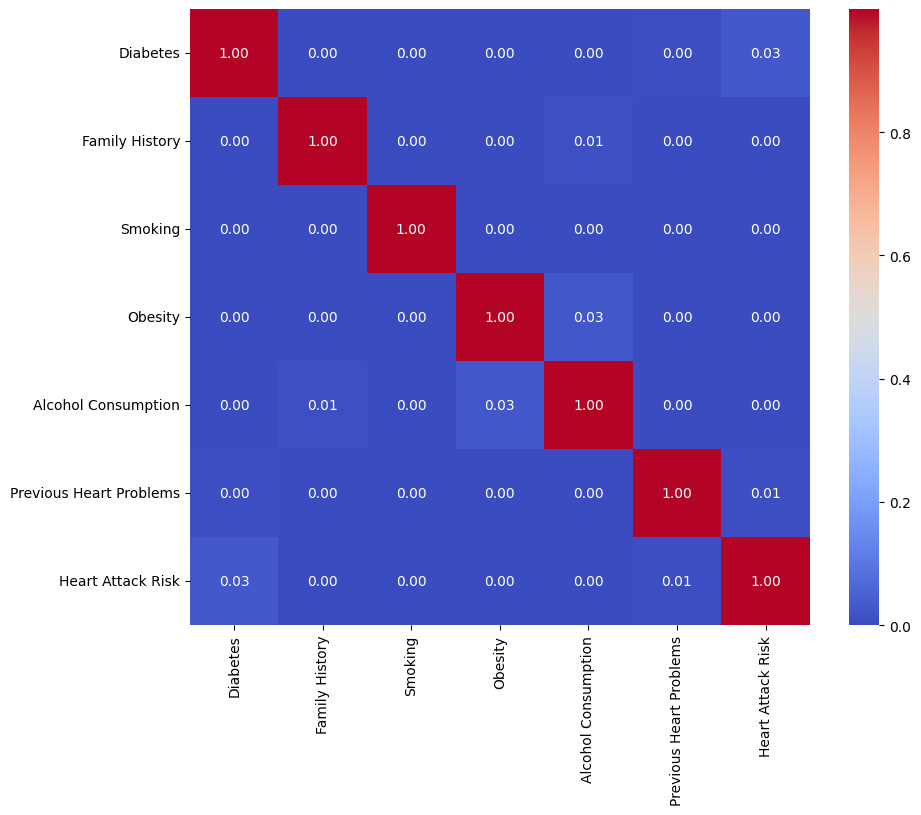

In [64]:
import numpy as np
from scipy.stats import chi2_contingency


# nous utilisons le V de cramer car nos observations sont ici qualitative et indépendante et nous avons une matrice
# carré 

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cols = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Heart Attack Risk']
cramers_v_matrix = pd.DataFrame(index=cols, columns=cols)

for col1 in cols:
    for col2 in cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(train[col1], train[col2])

import seaborn as sns
import matplotlib.pyplot as plt

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# les coefficient avec 2 fois la même variable ne sont pas à 1 car nous avons une correction de la continuité pour
# faire face au sous effectif.

In [50]:
pd.set_option('display.max_seq_items', None)
#pd.set_option('display.width', None)
for col in train.columns:
    print("Colonne :", col)
    print(train[col].unique())
pd.reset_option('display.max_seq_items')
#pd.reset_option('display.width')

Colonne : Patient ID
['RDG0550' 'NMA3851' 'TUI5807' ... 'GCY1316' 'RPK2629' 'CWO3455']
Colonne : Age
[33 56 19 50 89 64 86 85 61 28 18 88 58 60 20 55 44 72 26 68 40 37 46 25
 80 57 66 71 42 36 45 41 75 49 67 73 78 51 24 22 21 52 29 34 65 30 82 77
 62 54 63 87 27 39 90 43 38 32 84 59 48 76 53 31 35 23 74 70 81 69 47 79
 83]
Colonne : Sex
['Male' 'Female']
Colonne : Cholesterol
[200 262 140 163 144 185 350 246 149 306 157 294 194 175 314 198 357 248
 344 235 356 135 254 280 313 378 290 353 124 227 237 214 318 229 392 263
 176 148 330 341 213 181 328 300 186 348 389 220 168 365 303 305 150 296
 375 398 281 201 352 351 272 322 234 270 202 288 317 399 139 170 394 311
 289 279 137 293 178 208 130 133 284 162 236 291 224 277 360 154 174 333
 158 230 267 261 369 255 396 161 155 183 345 165 153 337 120 336 292 342
 190 382 321 199 244 266 320 192 146 283 167 228 184 363 136 131 388 332
 126 252 219 238 127 381 210 143 253 334 265 216 204 249 343 372 145 324
 331 226 241 271 212 367 180 257 221 

In [31]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


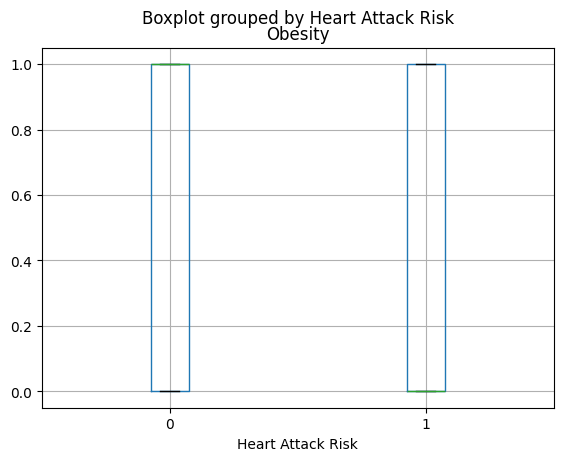

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

trainCorr_numeric.boxplot('Obesity',by = 'Heart Attack Risk')
plt.show()

# Regression logistique


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df_numeric = train.select_dtypes(include=['int64', 'float64'])

X = df_numeric.drop('Heart Attack Risk', axis=1)
y = df_numeric['Heart Attack Risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)


print('Accuracy: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy: 0.64


In [35]:
acc=logreg.score(X_test, y_test)
z=1.96
b=z/(1+z**2/len(y_test))*np.sqrt(acc*(1-acc)/len(y_test)+z**2/(4*len(y_test)**2))
a = 1/(1+z**2/len(y_test))*(acc+z**2/(2*len(y_test)))
print(a-b,a+b)
# intervalle de confiance à 95% de l'accuracy

0.6226494344789497 0.6635609764033872


In [27]:
print(y_test.value_counts())

Heart Attack Risk
0    1353
1     750
Name: count, dtype: int64


In [28]:
750/(1353 +750)

0.3566333808844508